# AUTO$^2$ and AUTO-Demos : *plp* - Fold Continuation for Periodic Solutions.

**This is an example on how to use AUTO$^2$ to explore the AUTO Demos *plp* bifurcations and solutions.**

In this example, a one-compartment activator-inhibitor system (Kernévez (1980)) is investigated. The equations of the model are given by:

$$
\dot s = (s_0 - s) - \rho \, R(s, a)
$$
$$
\dot a = \alpha (a_0 - a) - \rho \, R(s, a)
$$

where $R(s) = (s \ a) / (1 + s + \kappa\, s^2)$ with $\kappa > 0$. The free parameter is $\rho$ . Other parameters are fixed. This equation is also considered in Doedel, Keller & Kernévez (1991a).

We are thus going to find the fixed points and periodic orbits of this system and continue them by varying $\rho$.

#### References

* Kernévez, J. P. (1980), *Enzyme Mathematics*, North-Holland Press, Amsterdam. [[link](https://books.google.be/books?hl=fr&lr=&id=04n1XU16khIC&oi=fnd&pg=PP1&dq=kernevez+enzyme+mathematics&ots=X_64rEJO8t&sig=nOF7rxGrchs3L5vGbpPgKHLyJ28#v=onepage&q=kernevez%20enzyme%20mathematics&f=false)]
* Doedel, E. J., Keller, H. B. & Kernévez, J. P. (1991a), ‘Numerical analysis and control of
bifurcation problems: (I) Bifurcation in finite dimensions’, *Int. J. Bifurcation and Chaos*
**1**(3), 493–520. [[link](https://www.worldscientific.com/doi/abs/10.1142/s0218127491000397)]

## Code

First we set the Python path if needed:

In [1]:
import sys, os

In [2]:
sys.path.extend([os.path.abspath('../../../')])

And load the needed libraries, including AUTO$^2$:

In [3]:
import numpy as np
from numba import njit
from scipy.optimize import root
from scipy.integrate import solve_ivp

In [4]:
from auto2.diagrams.bifurcations import BifurcationDiagram

2025-07-18 11:03:55,098 INFO: Module bifurcations.py -- Using auto-AUTO (AUTO² or auto2) -- An AUTO-07p automatic search algorithm codebase
2025-07-18 11:03:55,098 INFO: Module bifurcations.py -- Read AUTO-07p manual first before using it. Wishing you a happy continuation, have fun !
2025-07-18 11:03:55,099 INFO: Module bifurcations.py -- Logging messages can be found in the file "auto2.log"


Creating the model equations

In [5]:
# maybe finally not needed here

@njit
def plp(u, s0, a0, alpha, rho, kappa):
    F = np.zeros(2)
    s = u[0]
    a = u[1]
    d = 1 + s + kappa * s**2
    r = s * a / d
    F[1] = s0 - s - rho * r
    F[2] = alpha * (a0 - a) - rho * r

    return F

@njit
def plpt(t, u, s0, a0, alpha, rho, kappa):
    return plp(u, s0, a0, alpha, rho, kappa)

and define a set of standard parameters:

In [6]:
params = {
    's0': 110.,
    'a0': 500.,
    'alpha': 0.2,
    'rho': 2.021628,
    'kappa': 0.1,
}

Next we setup the list of points and parameters that AUTO$^2$ will have to continue. We are providing only one point for the value $\rho = 2.021628$ :

In [7]:
initial_points = list()

initial_points.append({'parameters': params, 'initial_data': np.array([4.555974e1, 1.777987e2])})

We are now ready to compute the diagram of fixed points as a function of $\rho$. Note that we specify that the bifurcation diagram object must load the ̀`plp.f90` and `c.plp` files where the model equations and continuation parameters have been written.

In [8]:
b = BifurcationDiagram('plp')

b.compute_fixed_points_diagram(initial_points,extra_comparison_parameters=['s', 'a'], comparison_tol=[1.e-1] * 3,
                               ICP=['rho'], NMX=1000, UZSTOP={'rho':[2.,6.]}, UZR={'rho': list(np.arange(2.25, 6., 0.25))}, NPR=0)

2025-07-18 11:03:55,122 INFO: Module bifurcations.py -- Starting the computation of the fixed points bifurcation diagram with model plp
2025-07-18 11:03:55,122 INFO: Module bifurcations.py -- Continuing provided fixed points.


Runner configured
Starting plp ...

  BR    PT  TY  LAB      rho         L2-NORM          s             a       
   1     1  EP    1   2.02163E+00   1.83543E+02   4.55597E+01   1.77799E+02
   1    15  UZ    2   2.25000E+00   1.62903E+02   4.15053E+01   1.57526E+02
   1    22  UZ    3   2.50000E+00   1.43810E+02   3.77532E+01   1.38766E+02
   1    28  UZ    4   2.75000E+00   1.27875E+02   3.46198E+01   1.23099E+02
   1    33  UZ    5   3.00000E+00   1.14577E+02   3.20033E+01   1.10016E+02
   1    37  UZ    6   3.25000E+00   1.03444E+02   2.98111E+01   9.90556E+01
   1    41  HB    7   3.49995E+00   9.40760E+01   2.79647E+01   8.98235E+01
   1    42  UZ    8   3.50000E+00   9.40744E+01   2.79644E+01   8.98219E+01
   1    45  UZ    9   3.75000E+00   8.61345E+01   2.63979E+01   8.19897E+01
   1    48  UZ   10   4.00000E+00   7.93569E+01   2.50593E+01   7.52964E+01
   1    50  UZ   11   4.25000E+00   7.35278E+01   2.39066E+01   6.95328E+01
   1    52  UZ   12   4.50000E+00   6.84774E+01   2

2025-07-18 11:03:55,264 INFO: Module bifurcations.py -- Saving valid branch 1 emanating from detected fixed point 1.
2025-07-18 11:03:55,264 INFO: Module bifurcations.py -- Provided fixed points continuation has ended.
2025-07-18 11:03:55,265 INFO: Module bifurcations.py -- Eventually continuing detected branching points.
2025-07-18 11:03:55,265 INFO: Module bifurcations.py -- Continuing branching points of branch: 1
2025-07-18 11:03:55,266 INFO: Module bifurcations.py -- Treating forward direction.
2025-07-18 11:03:55,266 INFO: Module bifurcations.py -- Treating backward direction.
2025-07-18 11:03:55,267 INFO: Module bifurcations.py -- Fixed points bifurcation diagram computation is over.
2025-07-18 11:03:55,267 INFO: Module bifurcations.py -- All possible fixed point branches have been computed.


plp ... done


We can now plot the result as functions of $\rho$ and $L^2$ norm :

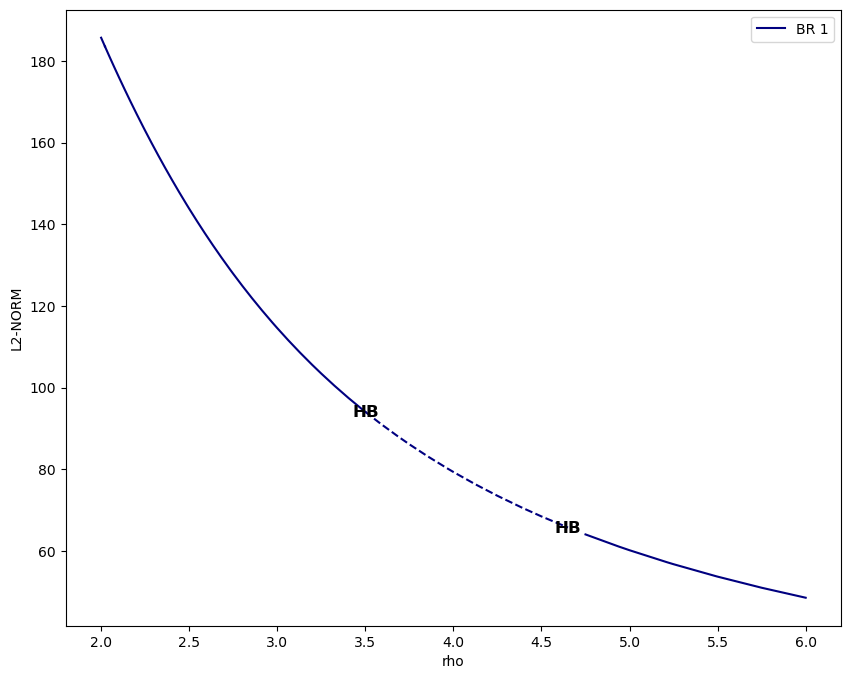

In [9]:
b.plot_fixed_points_diagram(cmap='gist_ncar');

and also as functions of $s$ and $a$ :

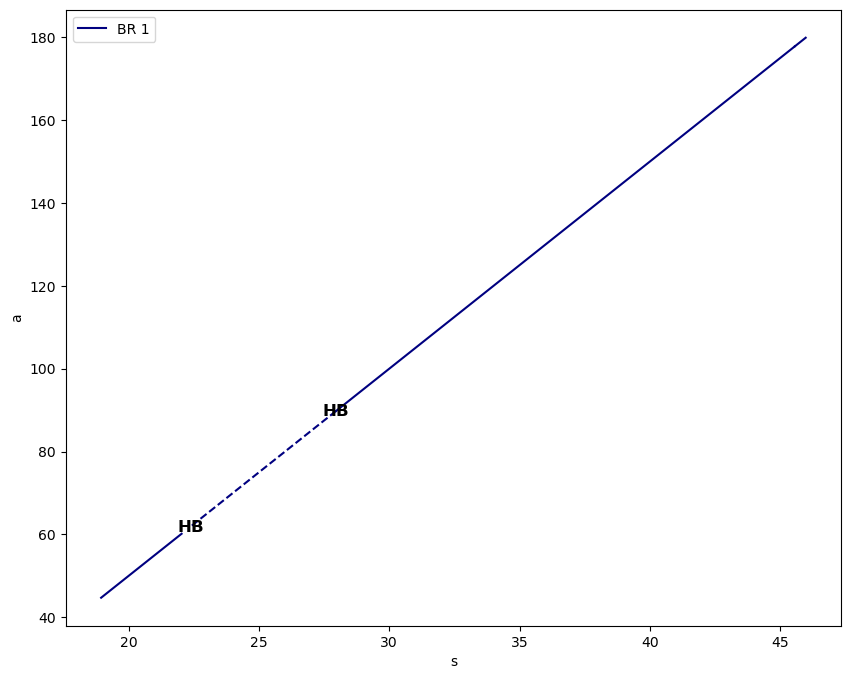

In [10]:
b.plot_fixed_points_diagram((2,3),cmap='gist_ncar');

We see that two Hopf bifurcations were found.

We can continue periodic orbits out of these Hopf bifurcations : 

In [11]:
b.compute_periodic_orbits_diagram(
    3, 
    extra_comparison_parameters=['s', 'a'], 
    comparison_tol=[1.e-1, 1.e-1, 1.e-1],
    ICP=['rho']
)


2025-07-18 11:03:55,590 INFO: Module bifurcations.py -- Starting the computation of the periodic orbits bifurcation diagram with model plp
2025-07-18 11:03:55,591 INFO: Module bifurcations.py -- Computing periodic orbits up to level 3
2025-07-18 11:03:55,592 INFO: Module bifurcations.py -- NMX parameters was not set, so setting it to 9000 points.
2025-07-18 11:03:55,592 INFO: Module bifurcations.py -- First, beginning computation of the periodic orbits from Hopf bifurcations.
2025-07-18 11:03:55,593 INFO: Module bifurcations.py -- Computing Hopf bifurcations of branch 1
2025-07-18 11:03:55,593 INFO: Module bifurcations.py -- Treating forward direction.
2025-07-18 11:03:55,594 INFO: Module bifurcations.py -- Continuing PO out of Hopf point 1. Launching AUTO...


Runner configured
Starting plp ...

  BR    PT  TY  LAB      rho         L2-NORM        MAX s         MAX a           T       
   2    80  UZ   20   3.25000E+00   1.02456E+02   3.83807E+01   1.10966E+02   8.12826E+00
   2    98  UZ   21   3.00000E+00   1.11511E+02   4.54097E+01   1.27434E+02   8.90426E+00
   2   113  LP   22   2.75969E+00   1.20187E+02   5.36655E+01   1.44938E+02   1.00064E+01
   2   158  UZ   23   3.00000E+00   1.10019E+02   5.09252E+01   1.32867E+02   8.84643E+00
   2   177  UZ   24   3.25000E+00   1.00649E+02   4.82621E+01   1.21833E+02   8.13869E+00
   2   186  UZ   25   3.50000E+00   9.25360E+01   4.56542E+01   1.11813E+02   7.58793E+00
   2   190  UZ   26   3.75000E+00   8.54592E+01   4.32509E+01   1.03085E+02   7.13053E+00
   2   193  UZ   27   4.00000E+00   7.92438E+01   4.10342E+01   9.51527E+01   6.73966E+00
   2   195  UZ   28   4.25000E+00   7.37520E+01   3.89439E+01   8.80406E+01   6.40175E+00
   2   197  UZ   29   4.50000E+00   6.88722E+01   3.69837E+01  

2025-07-18 11:04:07,085 INFO: Module bifurcations.py -- Not storing full results of PO point at ['rho', 'T'] = [3.499953828, 7.5605848537] (branch 1) because it repeats itself (forward).
Saving only the relevant part. NMX set to 226


Runner configured
Starting plp ...

  BR    PT  TY  LAB      rho         L2-NORM        MAX s         MAX a           T       
   2    80  UZ   20   3.25000E+00   1.02456E+02   3.83807E+01   1.10966E+02   8.12826E+00
   2    98  UZ   21   3.00000E+00   1.11511E+02   4.54097E+01   1.27434E+02   8.90426E+00
   2   113  LP   22   2.75969E+00   1.20187E+02   5.36655E+01   1.44938E+02   1.00064E+01
   2   158  UZ   23   3.00000E+00   1.10019E+02   5.09252E+01   1.32867E+02   8.84643E+00
   2   177  UZ   24   3.25000E+00   1.00649E+02   4.82621E+01   1.21833E+02   8.13869E+00
   2   186  UZ   25   3.50000E+00   9.25360E+01   4.56542E+01   1.11813E+02   7.58793E+00
   2   190  UZ   26   3.75000E+00   8.54592E+01   4.32509E+01   1.03085E+02   7.13053E+00
   2   193  UZ   27   4.00000E+00   7.92438E+01   4.10342E+01   9.51527E+01   6.73966E+00
   2   195  UZ   28   4.25000E+00   7.37520E+01   3.89439E+01   8.80406E+01   6.40175E+00
   2   197  UZ   29   4.50000E+00   6.88722E+01   3.69837E+01  

2025-07-18 11:04:07,446 INFO: Module bifurcations.py -- Saving valid branch 2 emanating from branch 1 (Hopf point 1).
2025-07-18 11:04:07,446 INFO: Module bifurcations.py -- Continuing PO out of Hopf point 2. Launching AUTO...


Runner configured
Starting plp ...

  BR    PT  TY  LAB      rho         L2-NORM        MAX s         MAX a           T       
   3    44  UZ   20   4.75000E+00   6.40421E+01   2.66853E+01   6.61684E+01   5.91466E+00
   3    85  UZ   21   5.00000E+00   6.03248E+01   3.13496E+01   6.83837E+01   5.68800E+00
   3    88  LP   22   5.00784E+00   6.02713E+01   3.19401E+01   6.89315E+01   5.67658E+00
   3    89  UZ   23   5.00000E+00   6.04450E+01   3.24852E+01   6.96136E+01   5.67699E+00
   3    94  UZ   24   4.75000E+00   6.45036E+01   3.51165E+01   7.58117E+01   5.86453E+00
   3    97  UZ   25   4.50000E+00   6.88722E+01   3.69801E+01   8.16335E+01   6.11024E+00
   3    99  UZ   26   4.25000E+00   7.37520E+01   3.89356E+01   8.80271E+01   6.40175E+00
   3   101  UZ   27   4.00000E+00   7.92438E+01   4.10180E+01   9.51576E+01   6.73966E+00
   3   104  UZ   28   3.75000E+00   8.54592E+01   4.32554E+01   1.03074E+02   7.13053E+00
   3   107  UZ   29   3.50000E+00   9.25360E+01   4.56885E+01  

2025-07-18 11:04:19,530 INFO: Module bifurcations.py -- Not storing full results of PO point at ['rho', 'T'] = [4.6504578126, 6.0078093361] (branch 1) because it repeats itself (forward).
Saving only the relevant part. NMX set to 255


Runner configured
Starting plp ...

  BR    PT  TY  LAB      rho         L2-NORM        MAX s         MAX a           T       
   3    44  UZ   20   4.75000E+00   6.40421E+01   2.66853E+01   6.61684E+01   5.91466E+00
   3    85  UZ   21   5.00000E+00   6.03248E+01   3.13496E+01   6.83837E+01   5.68800E+00
   3    88  LP   22   5.00784E+00   6.02713E+01   3.19401E+01   6.89315E+01   5.67658E+00
   3    89  UZ   23   5.00000E+00   6.04450E+01   3.24852E+01   6.96136E+01   5.67699E+00
   3    94  UZ   24   4.75000E+00   6.45036E+01   3.51165E+01   7.58117E+01   5.86453E+00
   3    97  UZ   25   4.50000E+00   6.88722E+01   3.69801E+01   8.16335E+01   6.11024E+00
   3    99  UZ   26   4.25000E+00   7.37520E+01   3.89356E+01   8.80271E+01   6.40175E+00
   3   101  UZ   27   4.00000E+00   7.92438E+01   4.10180E+01   9.51576E+01   6.73966E+00
   3   104  UZ   28   3.75000E+00   8.54592E+01   4.32554E+01   1.03074E+02   7.13053E+00
   3   107  UZ   29   3.50000E+00   9.25360E+01   4.56885E+01  

2025-07-18 11:04:19,896 INFO: Module bifurcations.py -- Not storing full results of PO point at ['rho', 'T'] = [4.6504578126, 6.0078093361] (branch 1) because it merges forward with branch 2.
Saving only the relevant part. NMX set to 45


Runner configured
Starting plp ...

  BR    PT  TY  LAB      rho         L2-NORM        MAX s         MAX a           T       
   3    44  UZ   20   4.75000E+00   6.40421E+01   2.66853E+01   6.61684E+01   5.91466E+00
   3    45  EP   21   4.75600E+00   6.39425E+01   2.68103E+01   6.62448E+01   5.90916E+00

 Total Time    0.498E-01


2025-07-18 11:04:20,005 INFO: Module bifurcations.py -- Saving valid branch 3 emanating from branch 1 (Hopf point 2).


plp ... done


2025-07-18 11:04:20,006 INFO: Module bifurcations.py -- Treating backward direction.
2025-07-18 11:04:20,006 INFO: Module bifurcations.py -- Continuation of the periodic orbits from Hopf bifurcations has ended.
2025-07-18 11:04:20,006 INFO: Module bifurcations.py -- Beginning computation of the periodic orbits from detected branching and period doubling points.
2025-07-18 11:04:20,007 INFO: Module bifurcations.py -- Entering level 2 of continuation...
2025-07-18 11:04:20,007 INFO: Module bifurcations.py -- Continuing branching points of branch: 2
2025-07-18 11:04:20,008 INFO: Module bifurcations.py -- Treating forward direction.
2025-07-18 11:04:20,009 INFO: Module bifurcations.py -- Treating backward direction.
2025-07-18 11:04:20,009 INFO: Module bifurcations.py -- Computation of branching points of branch: 2 has ended.
2025-07-18 11:04:20,009 INFO: Module bifurcations.py -- Continuing period doubling points of branch: 2
2025-07-18 11:04:20,010 INFO: Module bifurcations.py -- Treatin

and plot the results on a bifurcation diagram in $L^2$ norm:

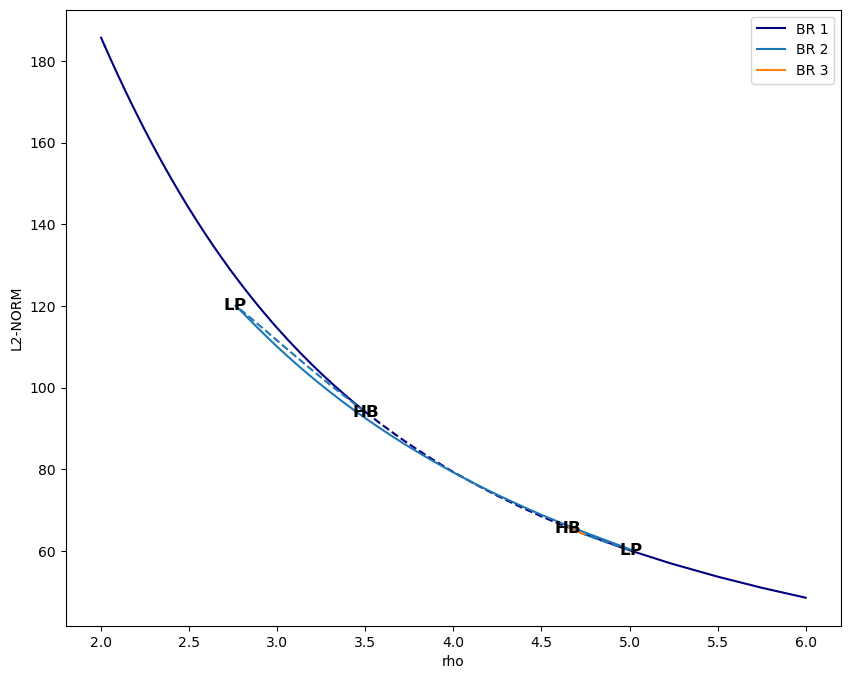

In [12]:
ax = b.plot_fixed_points_diagram(cmap='gist_ncar')
b.plot_periodic_orbits_diagram(ax=ax);

or in the maximum of the $a$ variable:

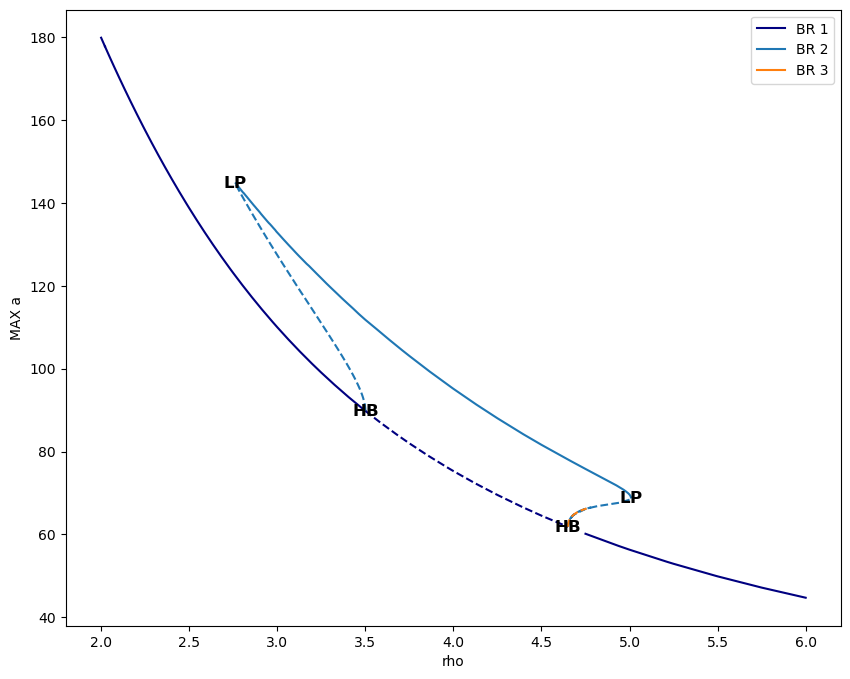

In [13]:
ax = b.plot_fixed_points_diagram(cmap='gist_ncar', variables=(0,3))
b.plot_periodic_orbits_diagram(ax=ax, variables=(0,3));

We can also plot both the bifurcation diagram and the solutions for a given value of $\rho$:

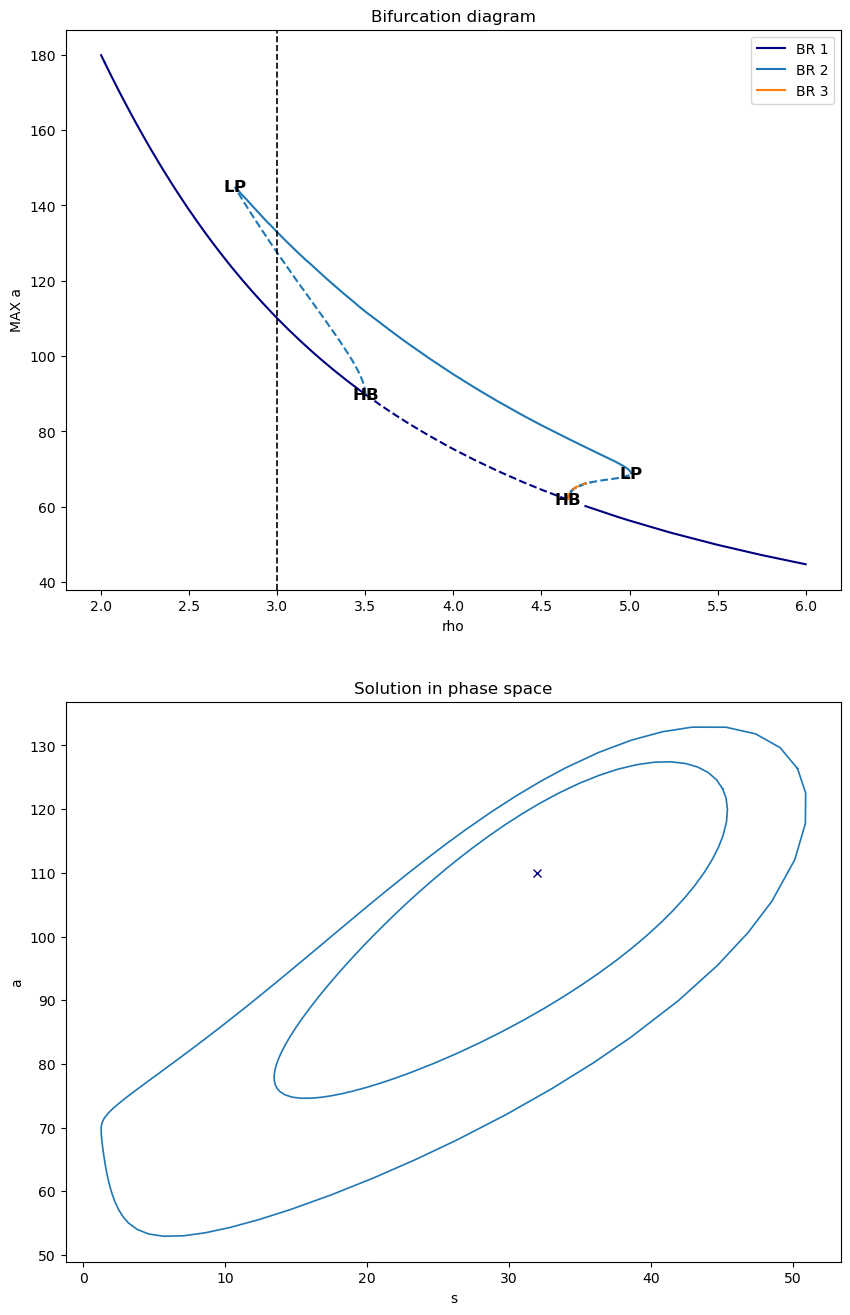

In [14]:
b.plot_diagram_and_solutions(3., solutions_variables=(0, 1), diagram_variables=(3,), fixed_points_diagram_kwargs={'legend': True, 'cmap': 'gist_ncar'}, );

or plot a single branch and its solutions:

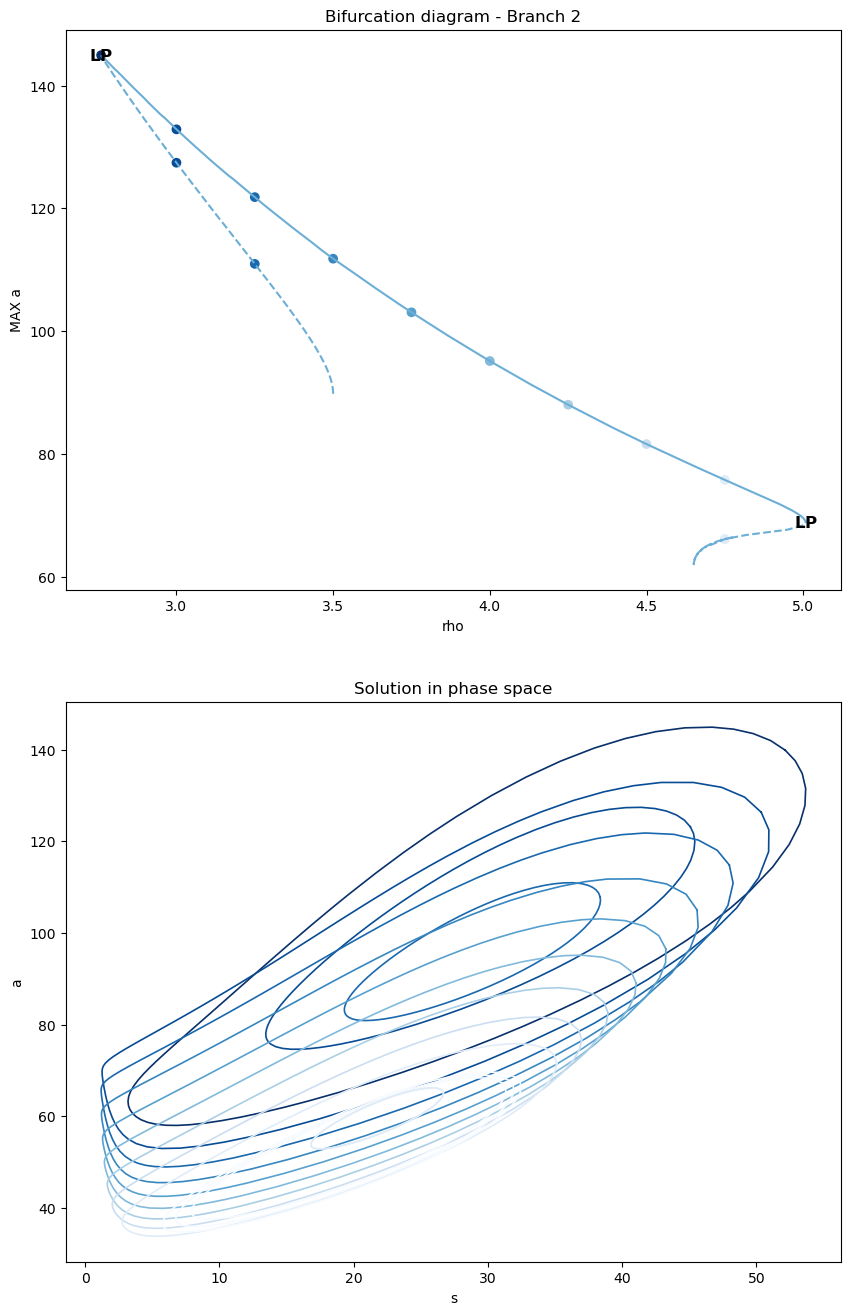

In [15]:
# plotting branch 4
b.plot_single_po_branch_and_solutions(2, diagram_variables=(3,), cmap='Blues_r');

You can now explore continuations in other parameters: